In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Seed random number generator - for reproducibility
np.random.seed(42)

## Binomial Distribution

Random coin flips are known as Bernoulli trials. A Bernoulli trial is an experiment with only two possible outcomes: success or failure, where the probability of success is the same every time the experiment is conducted. The number **r** of successes in **n** Bernoulli trials with probability **p** of success, is Binomially distributed. Example: **r** can be the number of heads in 4 coin flips. In this case, **p**=0.5 every time we flip the coin.

```np.random.binomial(n, p, size)``` is used for Binomial distributions, but let us take a look of how to implement it:

```
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    
    # Initialize number of successes
    n_success = 0

    # Perform trials:
    for i in range(n):
        # Choose random number between 0 & 1
        random_number = np.random.random()

        # if less than p, it's a success: add one to n_success
        if random_number < p:
            n_success += 1
    return n_success
```
This is provided we determined the size (number of trials) in a loop that repeatedly calls ```perform_bernoulli_trials()```. Now, we will apply Bernoulli trials on another example.


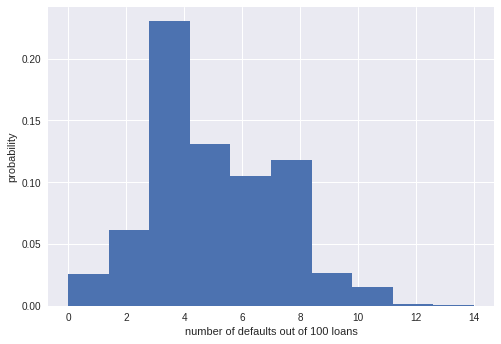

In [0]:
# Initialize an empty numpy array
n_defaults = np.empty(1000)

# Compute the number of defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Plot the histogram with default number of bins
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot:
plt.show()

In [0]:
def ecdf(data):
    """Compute Empirical Cumulative Distribution Function for
    a one-dimensional array of measurements."""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
  
# The y data of the ECDF go from 1/n to 1 in equally spaced increments
# end value in np.arange() is not inclusive: np.arange() will range from 1 to n+1

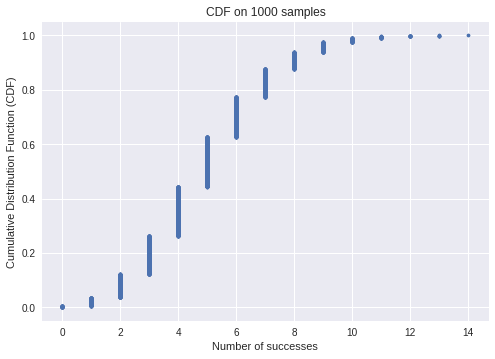

Probability of losing money = 0.0249


In [0]:
# Compute CDF on the 1000 samples
x, y = ecdf(n_defaults)

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of successes')
_ = plt.ylabel('Cumulative Distribution Function (CDF)')
_ = plt.title('CDF on 1000 samples')

plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

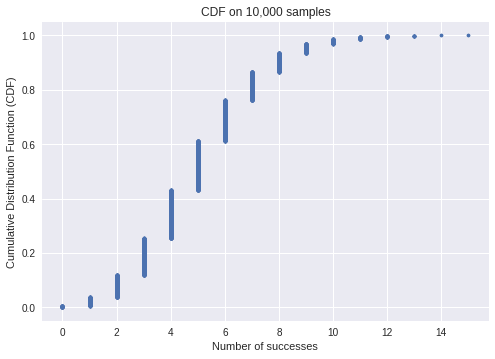

In [0]:
# Take 10,000 samples out of the binomial distribution
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF on the 10,000 samples
x, y = ecdf(n_defaults)

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of successes')
_ = plt.ylabel('Cumulative Distribution Function (CDF)')
_ = plt.title('CDF on 10,000 samples')

plt.show()

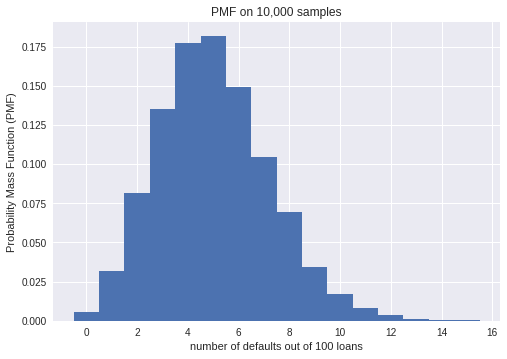

In [0]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
# to achieve the bin edges of -0.5, 0.5, 1.5, 2.5, ...
# up to max(n_defaults) + 1.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('Probability Mass Function (PMF)')
_ = plt.title('PMF on 10,000 samples')

plt.show()

## Poisson Distribution

A discrete probability distribution that expresses the **probability** of a given number of events occurring in a **fixed interval** of time or space if these events occur with a known constant rate and **independently** of the time since the last event. The **number of arrivals** of a Poisson process in a given **amount of time** obeys Poisson distribution. It uses just one parameter: the mean number of successes per time interval.

Example: the number **r** of hits on a website in **one hour** with an average of **6 hits** per hour. In this case, **r** is Poisson distributed, because the event of hitting a website doesn't affect the arrival times of future hits, i.e., hits on a website arrive **independently** from one another.

The Poisson distribution is a limit of the Binomial distribution for low probability of success and large amount of Bernoulli trials (rare events). Poisson distribution with arrival rate equal to **np** approximates a Binomial distribution for **n** Bernoulli trials with probability **p** of success (with large n and small p). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution. The following is a quick demonstration for the differences between the results of the two distributions.

Quick note: the same arrival rate & sample size will always result in getting the same Poisson distribution (given it is the same seed random generator).

In [0]:
# Draw 10,000 samples out of the Poisson distribution
samples_poisson = np.random.poisson(10, size=10000) # mean = 10

# Print the mean and standard deviation for Poisson distribution
print('Poisson:\nmean:', np.mean(samples_poisson),
      '\nstd:', np.std(samples_poisson))

# Specify values of n and p to consider for Binomial
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Print the mean and standard deviation for Binomial distribution
print('\nBinomial:')

# Draw 10,000 samples for each n,p pair
for i in range(3):
  
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    print('n =', n[i],':\n\tmean:', np.mean(samples_binomial),
          '\n\tstd:', np.std(samples_binomial))

Poisson:
mean: 9.9638 
std: 3.126449993203154

Binomial:
n = 20 :
	mean: 9.9988 
	std: 2.2436128364760264
n = 100 :
	mean: 9.9973 
	std: 2.979042247098889
n = 1000 :
	mean: 9.9941 
	std: 3.1011715834503577


The standard deviation of the Binomial distribution gets closer to that of the Poisson distribution as probability **p** gets lower.

Here is another exmple of Poisson distribution: In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a **rare event**, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been **251** of them through the 2015 season in over 200,000 games. 1990 and 2015 featured the most no-hitters of any season of baseball (seven no-hitters). Given that there are on average **251/115** no-hitters per season, what is the probability of having **seven or more** in a season?

In [0]:
# Draw 10,000 samples out of Poisson distribution
nohitters = np.random.poisson(251/115, 10000) # mean = 251/115

# Compute number of samples that are seven or greater
n = np.sum(nohitters>=7)

# Compute probability of getting seven or more no-hitters
p = n/10000

# Print the result
print('Probability of seven or more no-hitters:', p)

Probability of seven or more no-hitters: 0.0055


The result is about 7%. This means that it is not that unlikely to see a 7-or-more no-hitter season in a century. In this case, both Poisson and Binomial distributions would be appropriate to describe the number of no-hitters, but Poisson is easier to model and compute though.